# App Name: BC COVID-19 Support

In [1]:
pip install google-play-scraper

Note: you may need to restart the kernel to use updated packages.


In [2]:
from google_play_scraper import app
import pandas as pd
import numpy as np
from google_play_scraper import Sort, reviews_all

# Collect app reviews from Google Play by providing package name of app

In [3]:
us_reviews = reviews_all(
    'ca.bc.gov.health.hlbc.COVID19',
    sleep_milliseconds=0, # defaults to 0
    lang='en', # defaults to 'en'
    country='us', # defaults to 'us'
    sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT
)

In [4]:
df_busu = pd.DataFrame(np.array(us_reviews),columns=['review'])
df_busu = df_busu.join(pd.DataFrame(df_busu.pop('review').tolist()))
#len(df_busu)
#df_busu.head()

In [5]:
app_reviewsnew_df = pd.DataFrame(df_busu)

del app_reviewsnew_df["userImage"]
del app_reviewsnew_df["reviewId"]
del app_reviewsnew_df["thumbsUpCount"]
del app_reviewsnew_df["reviewCreatedVersion"]
del app_reviewsnew_df["at"]
del app_reviewsnew_df["replyContent"]
#del app_reviewsnew_df["sortOrder"]
del app_reviewsnew_df["repliedAt"]

app_reviewsnew_df.rename(columns = {'content' : 'Review', 'score' : 'Rating'}, inplace = True)

app_reviewsnew_df.head(9999)


,userName,Review,Rating
0,Joan Lichtmann,Works well but the self assessment tool disapp...,4
1,Patricia Emsley,Great app 👌,5
2,simon t,Wheny Pixel started to crash when I used the A...,4
3,Carol Anne Penner,UPDATE - developers recognized the issue and f...,4
4,Rebecca Cross,Unable to report symptoms. Have no access to c...,1
...,...,...,...
123,A Google user,The assessment needs a better breakdown of sym...,3
124,A Google user,"Never any updates, no clarification of who sho...",2
125,A Google user,It would be appreciated if I could know where ...,1
126,A Google user,Clear and easy to use,4


## Create an output file of reviews collected 

In [6]:
app_reviewsnew_df.to_csv('ca.bc.gov.health.hlbc.COVID19.csv', index=None, header=True)

In [7]:
pip install num2words

Note: you may need to restart the kernel to use updated packages.


## Read the input file of reviews collected 

In [8]:
pd.set_option('display.max_colwidth',800)
pd.options.mode.chained_assignment = None  # default='warn'
reviews = pd.read_csv("ca.bc.gov.health.hlbc.COVID19.csv", encoding="utf8")

In [9]:
reviews.head(9999)

,userName,Review,Rating
0,Joan Lichtmann,Works well but the self assessment tool disappeared after not using app for a while,4
1,Patricia Emsley,Great app 👌,5
2,simon t,Wheny Pixel started to crash when I used the App. I reported this to developers. They replied and acknowledged the bug(s). Kept us posted on patch release. All good now!!,4
3,Carol Anne Penner,UPDATE - developers recognized the issue and fixed. App is running smooth again. This was a five start app but now it hasn't worked for over a month. Crashes since Android update.,4
4,Rebecca Cross,Unable to report symptoms. Have no access to cell service and so unable to contact 8-1-1 ( need online chat ) very difficult to use or navigate.,1
...,...,...,...
123,A Google user,The assessment needs a better breakdown of symptoms. For example there are ways to distinguish between whether you are just experiencing seasonal allergies or actual Covid 19. Adding a few more questions would improve the value of the assessment and people will be less skeptical of its accuracy.,3
124,A Google user,"Never any updates, no clarification of who should stay off work, and an online test that only says stay at home for 10 days if you're sick. As useless as the BC government's reaction to the whole mess. People should be fired.",2
125,A Google user,It would be appreciated if I could know where the cases are.i think that is what people want to know.,1
126,A Google user,Clear and easy to use,4


In [10]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

## Pre-processing of reviews

In [11]:
# Find floats
reviews['Review'].apply(lambda x:isinstance(x, float))

# Make all strings
reviews['Review']=reviews['Review'].apply(str)

import string
#print(string.punctuation)

def remove_punctuation(text):
    text_nopunct = ''.join([c for c in text if c not in string.punctuation])
    return text_nopunct

import re

def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

def remove_special_chars(text):
    return(re.sub(r"\W+|_", " ", text)) 

import re
from num2words import num2words

# function to convert numbers to words
def num_to_words(text):
    
# splitting text into words with space
    after_spliting = text.split()

    for index in range(len(after_spliting)):
        if after_spliting[index].isdigit():
            after_spliting[index] = num2words(after_spliting[index])

    # joining list into string with space
    numbers_to_words = ' '.join(after_spliting)
    return numbers_to_words

def remove_extra_spaces(text):

 space_pattern = r'\s+'
 without_space = re.sub(pattern=space_pattern, repl=" ", string=text)
 return without_space

def lower_case_convertion(text):

    lower_text = text.lower()
    return lower_text

from nltk.corpus import stopwords
from nltk import word_tokenize
all_stopwords  = set(stopwords.words('english'))

def remove_stopwords(text):

    text_without_sw = []
    # tokenization
    text_tokens = word_tokenize(text)
    for word in text_tokens:
        # checking word is stopword or not
        if word not in all_stopwords:
            text_without_sw.append(word)

    # joining all tokens after removing stop words
    without_sw = ' '.join(text_without_sw)
    return without_sw


from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()

def lemmatization(text):
    # word tokenization
    tokens = word_tokenize(text)

    for index in range(len(tokens)):
     # lemma word
        lemma_word = lemma.lemmatize(tokens[index])
        tokens[index] = lemma_word

    return ' '.join(tokens) 

In [12]:
for ind in reviews.index:
    reviews['Review'][ind]=remove_punctuation(reviews['Review'][ind])    
        
for ind in reviews.index:
     reviews['Review'][ind]=remove_emoji(reviews['Review'][ind])        
        
for ind in reviews.index:
     reviews['Review'][ind]=remove_special_chars(reviews['Review'][ind])        
        
for ind in reviews.index:
     reviews['Review'][ind]=num_to_words(reviews['Review'][ind])        
        
for ind in reviews.index:
     reviews['Review'][ind]=remove_extra_spaces(reviews['Review'][ind])
for ind in reviews.index:
     reviews['Review'][ind]=lower_case_convertion(reviews['Review'][ind])   
        
for ind in reviews.index:
     reviews['Review'][ind]=remove_stopwords(reviews['Review'][ind])  
        
for ind in reviews.index:
     reviews['Review'][ind]=lemmatization(reviews['Review'][ind])  
        
reviews.head(15)

,userName,Review,Rating
0,Joan Lichtmann,work well self assessment tool disappeared using app,4
1,Patricia Emsley,great app,5
2,simon t,wheny pixel started crash used app reported developer replied acknowledged bug kept u posted patch release good,4
3,Carol Anne Penner,update developer recognized issue fixed app running smooth five start app hasnt worked month crash since android update,4
4,Rebecca Cross,unable report symptom access cell service unable contact eight hundred eleven need online chat difficult use navigate,1
5,Richard Boiteau,app crash android twelve fine android eleven two star back five fix update android twelve,5
6,Personal Coach,tracking app covertly installed android device test emergency broadcast system easy find uninstall cautious search device another test real test savvy enough find delete peace bc,1
7,Alok Dutt,edit android twelve released oct twenty-one broke app according developer major bug app wont even open fix four month say worked quickly,2
8,Ellen Tsang,edit fixed longer crash thanks developer taking time respond let know reinstall selfcheck tab far right seems error though installed without inputting symptom already say please get covid19 test selfisolate,4
9,Zack van Helvoirt,app work following recent update,5


## Sentiment Analysis using Vader

In [13]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\gilla\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [14]:
app1_sentiment_vader = reviews[["Review"]]
app1_sentiment_vader['scores'] = app1_sentiment_vader['Review'].apply(lambda review: sid.polarity_scores(review))
app1_sentiment_vader.head(9999)

,Review,scores
0,work well self assessment tool disappeared using app,"{'neg': 0.19, 'neu': 0.6, 'pos': 0.21, 'compound': 0.0516}"
1,great app,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'compound': 0.6249}"
2,wheny pixel started crash used app reported developer replied acknowledged bug kept u posted patch release good,"{'neg': 0.138, 'neu': 0.714, 'pos': 0.148, 'compound': 0.0516}"
3,update developer recognized issue fixed app running smooth five start app hasnt worked month crash since android update,"{'neg': 0.0, 'neu': 0.883, 'pos': 0.117, 'compound': 0.3089}"
4,unable report symptom access cell service unable contact eight hundred eleven need online chat difficult use navigate,"{'neg': 0.135, 'neu': 0.865, 'pos': 0.0, 'compound': -0.3612}"
...,...,...
123,assessment need better breakdown symptom example way distinguish whether experiencing seasonal allergy actual covid nineteen adding question would improve value assessment people le skeptical accuracy,"{'neg': 0.073, 'neu': 0.667, 'pos': 0.26, 'compound': 0.7096}"
124,never update clarification stay work online test say stay home ten day youre sick useless bc government reaction whole mess people fired,"{'neg': 0.404, 'neu': 0.596, 'pos': 0.0, 'compound': -0.9042}"
125,would appreciated could know case arei think people want know,"{'neg': 0.0, 'neu': 0.635, 'pos': 0.365, 'compound': 0.5574}"
126,clear easy use,"{'neg': 0.0, 'neu': 0.154, 'pos': 0.846, 'compound': 0.6705}"


In [15]:
#Now will call out compound which is a polarity as a separate column and all values greater than zeroes will be considered 
#a positive review and all values less than zero would be considered as a negative review.
app1_sentiment_vader['Polarity']  = app1_sentiment_vader['scores'].apply(lambda score_dict: score_dict['compound'])
app1_sentiment_nvader = app1_sentiment_vader[["Review","Polarity"]]

In [16]:
app1_sentiment_nvader['Sentiment_Type']=''
app1_sentiment_nvader.loc[app1_sentiment_nvader.Polarity>0,'Sentiment_Type']='POSITIVE'
app1_sentiment_nvader.loc[app1_sentiment_nvader.Polarity==0,'Sentiment_Type']='NEUTRAL'
app1_sentiment_nvader.loc[app1_sentiment_nvader.Polarity<0,'Sentiment_Type']='NEGATIVE'
app1_sentiment_comparison = app1_sentiment_nvader[["Review"]]
app1_sentiment_comparison['polarity']= app1_sentiment_nvader["Polarity"]
app1_sentiment_comparison['Sentiment_Type']= app1_sentiment_nvader["Sentiment_Type"]

# Table showing Polarity and Sentiment type using Vader Sentiment Analysis

In [17]:
app1_sentiment_comparison.head(9999)

,Review,polarity,Sentiment_Type
0,work well self assessment tool disappeared using app,0.0516,POSITIVE
1,great app,0.6249,POSITIVE
2,wheny pixel started crash used app reported developer replied acknowledged bug kept u posted patch release good,0.0516,POSITIVE
3,update developer recognized issue fixed app running smooth five start app hasnt worked month crash since android update,0.3089,POSITIVE
4,unable report symptom access cell service unable contact eight hundred eleven need online chat difficult use navigate,-0.3612,NEGATIVE
...,...,...,...
123,assessment need better breakdown symptom example way distinguish whether experiencing seasonal allergy actual covid nineteen adding question would improve value assessment people le skeptical accuracy,0.7096,POSITIVE
124,never update clarification stay work online test say stay home ten day youre sick useless bc government reaction whole mess people fired,-0.9042,NEGATIVE
125,would appreciated could know case arei think people want know,0.5574,POSITIVE
126,clear easy use,0.6705,POSITIVE


# Count of positive, negative, and neutral reviews using Vader Sentiment Analysis 

In [18]:
app1_sentiment_nvader['Sentiment_Type'].value_counts()

POSITIVE    55
NEGATIVE    42
NEUTRAL     31
Name: Sentiment_Type, dtype: int64

<AxesSubplot:title={'center':'Vader Sentiment Analysis'}>

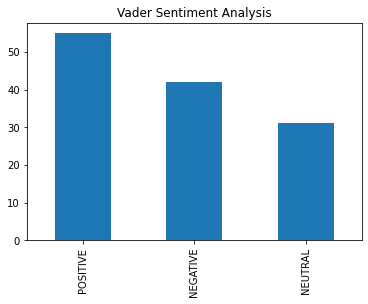

In [19]:
app1_sentiment_nvader.Sentiment_Type.value_counts().plot(kind='bar',title="Vader Sentiment Analysis")

## Sentiment Analysis using Textblob

In [20]:
pip install textblob

In [21]:
from textblob import TextBlob

In [22]:
app1_sentiment = reviews[["Review"]]
polar=[]
for ind in app1_sentiment.index:
        sentence = app1_sentiment['Review'][ind]
        blob = TextBlob(sentence)
        blob.sentiment
        print(blob.sentiment)
        polar.append(blob.sentiment.polarity)
        
app1_sentiment["Polarity"]=polar

Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.8, subjectivity=0.75)
Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Sentiment(polarity=0.25, subjectivity=0.35)
Sentiment(polarity=-0.5, subjectivity=0.6666666666666666)
Sentiment(polarity=0.20833333333333334, subjectivity=0.25)
Sentiment(polarity=0.2111111111111111, subjectivity=0.5444444444444444)
Sentiment(polarity=0.13194444444444445, subjectivity=0.5)
Sentiment(polarity=0.17142857142857143, subjectivity=0.4839285714285714)
Sentiment(polarity=0.0, subjectivity=0.175)
Sentiment(polarity=-0.5, subjectivity=0.2)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.31607142857142856, subjectivity=0.4982142857142857)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.4166666666666667, s

In [23]:
#app1_sentiment['Sentiment_Type'] = app1_sentiment['Polarity'].apply(lambda c: 'pos' if c >=0 else 'neg')
#app1_sentiment.head()

app1_sentiment['Sentiment_Type']=''
app1_sentiment.loc[app1_sentiment.Polarity>0,'Sentiment_Type']='POSITIVE'
app1_sentiment.loc[app1_sentiment.Polarity==0,'Sentiment_Type']='NEUTRAL'
app1_sentiment.loc[app1_sentiment.Polarity<0,'Sentiment_Type']='NEGATIVE'

app1_sentiment_comparison = app1_sentiment_nvader[["Review"]]
app1_sentiment_comparison['textblob_polarity']= app1_sentiment["Polarity"]
app1_sentiment_comparison['textblob_Sentiment_Type']= app1_sentiment["Sentiment_Type"]

# Table showing Polarity and Sentiment type using TextBlob Sentiment Analysis

In [24]:
app1_sentiment_comparison.head(9999)

,Review,textblob_polarity,textblob_Sentiment_Type
0,work well self assessment tool disappeared using app,0.000000,NEUTRAL
1,great app,0.800000,POSITIVE
2,wheny pixel started crash used app reported developer replied acknowledged bug kept u posted patch release good,0.700000,POSITIVE
3,update developer recognized issue fixed app running smooth five start app hasnt worked month crash since android update,0.250000,POSITIVE
4,unable report symptom access cell service unable contact eight hundred eleven need online chat difficult use navigate,-0.500000,NEGATIVE
...,...,...,...
123,assessment need better breakdown symptom example way distinguish whether experiencing seasonal allergy actual covid nineteen adding question would improve value assessment people le skeptical accuracy,0.000000,NEUTRAL
124,never update clarification stay work online test say stay home ten day youre sick useless bc government reaction whole mess people fired,-0.237857,NEGATIVE
125,would appreciated could know case arei think people want know,0.200000,POSITIVE
126,clear easy use,0.266667,POSITIVE


# Count of positive, negative, and neutral reviews using TextBlob Sentiment Analysis 

In [25]:
app1_sentiment['Sentiment_Type'].value_counts()

POSITIVE    55
NEUTRAL     53
NEGATIVE    20
Name: Sentiment_Type, dtype: int64

<AxesSubplot:title={'center':'Textblob Sentiment Analysis'}>

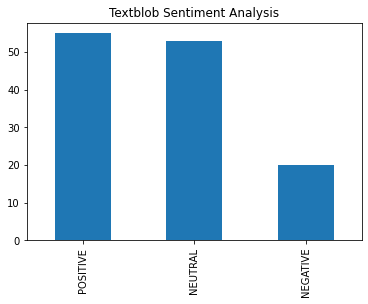

In [26]:
app1_sentiment.Sentiment_Type.value_counts().plot(kind='bar',title="Textblob Sentiment Analysis")

From my tests, VADER seems to work better with things like slang, emojis, etc — whereas TextBlob performs strongly with more formal language usage. VADER not only tells the lexicon is positive, negative, or neutral, it also tells how positive, negative, or neutral a sentence is. VADER gave the correct output with some of the problematic sentences and executed. The output brought me to the conclusion that TextBlob was struggling with negative sentences, particularly negations. VADER outperforms TextBlob when it comes to negative polarity detection. We can conclude that VADER does better sentiment analysis when it comes to negative polarity detection. 

## Top 15 frequent words in Reviews 

In [27]:
#how to get the top 100 frequent words on a python dataframe colummn
from collections import Counter
mostCommonWord = Counter(" ".join(app1_sentiment_comparison["Review"]).split()).most_common(15)
df_mostCommonWords = pd.DataFrame(mostCommonWord, columns =['Word', 'Frequency'])
df_mostCommonWords

,Word,Frequency
0,app,68
1,android,35
2,crash,23
3,phone,23
4,twelve,22
5,update,17
6,work,14
7,use,14
8,need,12
9,bc,12


<AxesSubplot:xlabel='Word'>

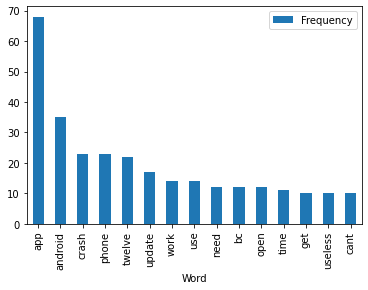

In [28]:
df_mostCommonWords.plot(x ='Word', y='Frequency', kind = 'bar')
